### Training and updating models

Before we get starting with explaining how, it's worth taking a second to ask ourselves: Why would we want to update the model with our own examples? Why can't we just rely on pre-trained models?

Statistical models make predictions based on the examples they were trained on.

You can usually make the model more accurate by showing it examples from your domain.

You often also want to predict categories specific to your problem, so the model needs to learn about them.

This is essential for text classification, very useful for entity recognition and a little less critical for tagging and parsing.

#### Why updating the model ?

1. Better results on your specific domain
2. Learn classificationschemes specifically for your problem
3. Essential for text classification
4. Very useful for named entity recognition
5. Less critical for part-of-speech tagging and dependency parsing

#### How training works (1)

spaCy supports updating existing models with more examples, and training new models.

If we're not starting with a pre-trained model, we first initialize the weights randomly.

Next, we call nlp dot update, which predicts a batch of examples with the current weights.

The model then checks the predictions against the correct answers, and decides how to change the weights to achieve better predictions next time.

Finally, we make a small correction to the current weights and move on to the next batch of examples.

We continue calling nlp dot update for each batch of examples in the data.

1. Initialize the model weights randomly with nlp.begin_training
2. Predict a few examples with the current weights by calling nlp..update
3. Compare prediction with true labels
4. Calculate how to change weights to improve predictions
5. Update weights slightly
6. Go back to step 2

#### How training works(2)

Here's an illustration showing the process.

The training data are the examples we want to update the model with.

The text should be a sentence, paragraph or longer document. For the best results, it should be similar to what the model will see at runtime.

The label is what we want the model to predict. This can be a text category, or an entity span and its type.

The gradient is how we should change the model to reduce the current error. It's computed when we compare the predicted label to the true label.

After training, we can then save out an updated model and use it in our application.

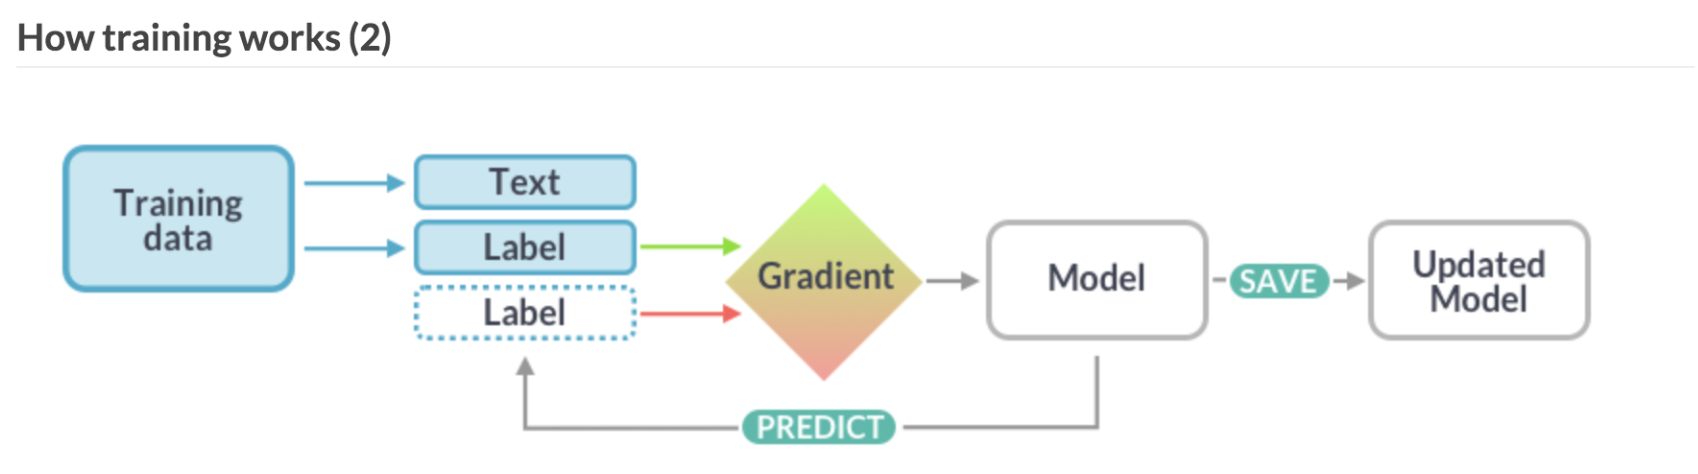

1. Training data: Examples and their annotations.
2. Text: The input text the model should predict a label for.
3. Label: The label the model should predict.
4. Gradient: How to change the weights.

#### Example : Training the new entity recognizer

Let's look at an example for a specific component: the entity recognizer.

The entity recognizer takes a document and predicts phrases and their labels. This means that the training data needs to include texts, the entities they contain, and the entity labels.

Entities can't overlap, so each token can only be part of one entity.

Because the entity recognizer predicts entities in context, it also needs to be trained on entities and their surrounding context.

The easiest way to do this is to show the model a text and a list of character offsets. For example, "iPhone X" is a gadget, starts at character 0 and ends at character 8.

It's also very important for the model to learn words that aren't entities.

In this case, the list of span annotations will be empty.

Our goal is to teach the model to recognize new entities in similar contexts, even if they weren't in the training data.

1. The entity recognizer tags words and phrases in context.
2. Each token can only be part of one entity.
3. Examples need to come with context.

("iPhone X is coming", {'entities': [(0, 8, 'Gadget')]})

4. Texts with no entities are also important

("I need a new phone! Any tips?", {'entities': []})

5. Goal: Teach the model to generalize

#### The training data

The training data tells the model what we want it to predict. This could be texts and named entities we want to recognize, or tokens and their correct part-of-speech tags.

To update an existing model, we can start with a few hundred to a few thousand examples.

To train a new category we may need up to a million.

spaCy's pre-trained English models for instance were trained on 2 million words labelled with part-of-speech tags, dependencies and named entities.

Training data is usually created by humans who assign labels to texts.

This is a lot of work, but can be semi-automated – for example, using spaCy's Matcher.

1. Examples of what we want the model to predict in context
2. Update an existing model: a few hundred to a few thousand examples
3. Train a new category: a few thousand to a million examples
    a. spaCy's English models: 2 million words
4. Usually created manually by human annotators
5. Can be semi-automated -- for example, using spaCy's Matcher!

### The training loop

The training loop is a series of steps that's performed to train or update a model.

We usually need to perform it several times, for multiple iterations, so that the model can learn from it effectively. If we want to train for 10 iterations, we need to loop 10 times.

To prevent the model from getting stuck in a suboptimal solution, we randomly shuffle the data for each iteration. This is a very common strategy when doing stochastic gradient descent.

Next, we divide the training data into batches of several examples, also known as minibatching. This makes it easier to make a more accurate estimate of the gradient.

Finally, we update the model for each batch, and start the loop again until we've reached the last iteration.

We can then save the model to a directory and use it in spaCy.

#### The steps of a training loop

1. Loop for a number of times.
2. Shuffle the training data.
3. Divide the data into batches.
4. Update the model for each batch.
5. Save the updated model.

#### Recap : How training works

To recap:

The training data are the examples we want to update the model with.

The text should be a sentence, paragraph or longer document. For the best results, it should be similar to what the model will see at runtime.

The label is what we want the model to predict. This can be a text category, or an entity span and its type.

The gradient is how we should change the model to reduce the current error. It's computed when we compare the predicted label to the true label.

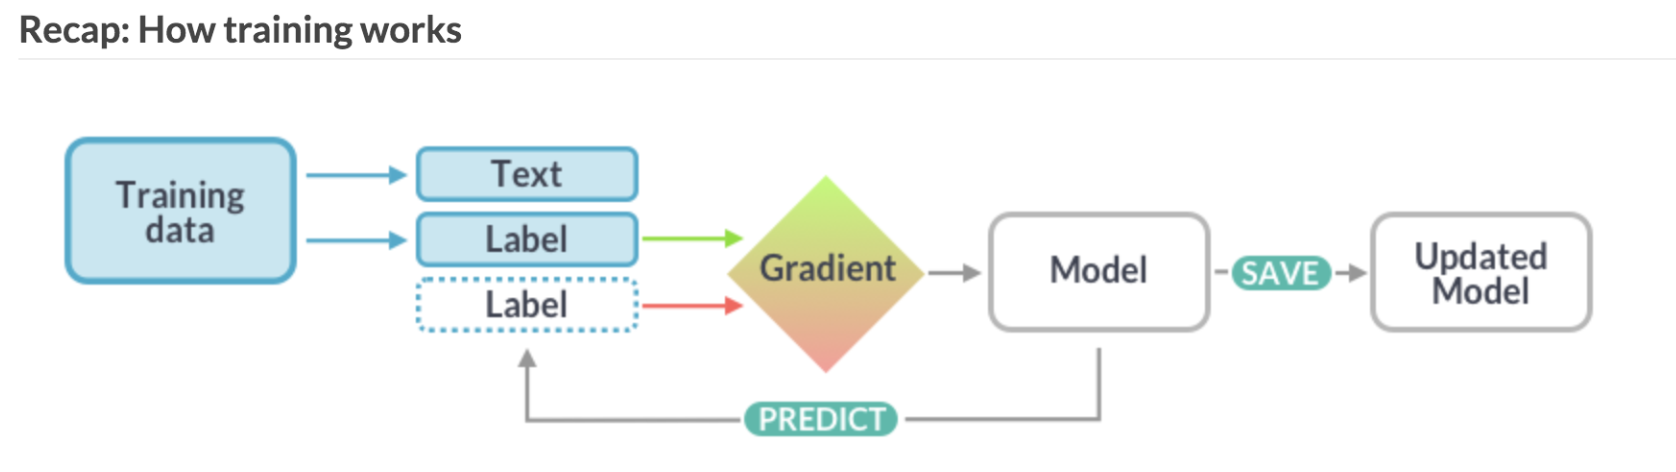

1. Training data: Examples and their annotations.
2. Text: The input text the model should predict a label for.
3. Label: The label the model should predict.
4. Gradient: How to change the weights.

Here's an example.

Let's imagine we have a list of training examples consisting of texts and entity annotations.

We want to loop for 10 iterations, so we're iterating over a range of 10.

Next, we use the random module to randomly shuffle the training data.

We then use spaCy's minibatch utility function to divide the examples into batches.

For each batch, we get the texts and annotations and call the nlp dot update method to update the model.

Finally, we call the nlp dot to disk method to save the trained model to a directory.

#### Example Loop

In [3]:
TRAINING_DATA = [
    ("How to preorder the iPhone X", {'entities': [(20, 28, 'GADGET')]})
    
]

In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')
import random
# Loop for 10 iterations
for i in range(10):
    # Shuffle the training data
    random.shuffle(TRAINING_DATA)
    # Create batches and iterate over them
    for batch in spacy.util.minibatch(TRAINING_DATA):
        # Split the batch in texts and annotations
        texts = [text for text, annotation in batch]
        print(texts)
        annotations = [annotation for text, annotation in batch]
        print(annotations)
        # Update teh model
        nlp.update(texts, annotations)

In [ ]:
# Save the model
nlp.to_disk(abc)

#### Updating an existing model

spaCy lets you update an existing pre-trained model with more data – for example, to improve its predictions on different texts.

This is especially useful if you want to improve categories the model already knows, like "person" or "organization".

You can also update a model to add new categories.

Just make sure to always update it with examples of the new category and examples of the other categories it previously predicted correctly. Otherwise improving the new category might hurt the other categories.

1. Improve the predictions on new data
2. Especially useful to improve existing categories, like PERSON
3. Also possible to add new categories
4. Be careful and make sure the model doesn't "forget" the old ones

#### Setting up a new pipeline from scratch

In this example, we start off with a blank English model using the spacy dot blank method. The blank model doesn't have any pipeline components, only the language data and tokenization rules.

We then create a blank entity recognizer and add it to the pipeline.

Using the "add label" method, we can add new string labels to the model.

We can now call nlp dot begin training to initialize the model with random weights.

To get better accuracy, we want to loop over the examples more than once and randomly shuffle the data on each iteration.

On each iteration, we divide the examples into batches using spaCy's minibatch utility function. Each example consists of a text and its annotations.

Finally, we update the model with the texts and annotations and continue the loop

In [ ]:
# Start with black English model
nlp = spacy.load('en_core_web_lg')
# Create blank entity recognizer and add it to the pipeline
nlp.remove_pipe("ner")
ner = nlp.create_pipe('ner')
nlp.add_pipe(ner)
# Add a new label
ner.add_label('GADGET')


# Start the training
nlp.begin_training()
# Train for 10 transactions
for itn in range(10):
    random.shuffle(examples)
    # Divide examples into batches
    for batch in spacy.util.minibatch(examples, size=2):
        texts = [text for text, annotation in batch]
        annotations = [annotation for text, annotation in batch]
        # Update the model
        nlp.update(texts, annotations)

### Best practices for training spaCy models

#### Problem 1: Models can "forget" things

Statistical models can learn lots of things – but it doesn't mean that they won't unlearn them.

If you're updating an existing model with new data, especially new labels, it can overfit and adjust too much to the new examples.

For instance, if you're only updating it with examples of "website", it may "forget" other labels it previously predicted correctly – like "person".

This is also known as the catastrophic forgetting problem

1. Existing model can overfit on new data
    a. e.g.: If you only update itwith WEBSITE, it can "unlearn" what a PERSON is
        
2. Also known as "catastrophic forgetting" problem

#### Solution 1: Mix in previously correct predictions

To prevent this, make sure to always mix in examples of what the model previously got correct.

If you're training a new category "website", also include examples of "person".

spaCy can help you with this. You can create those additional examples by running the existing model over data and extracting the entity spans you care about.

You can then mix those examples in with your existing data and update the model with annotations of all labels.

1. For example, if you're training WEBSITE, also include examples of PERSON
2. Run existing spaCy model over data and extract all other relevant entities

In [ ]:
BAD:
    
TRAINING_DATA = [
    ('Reddit is a website', {'entities': [(0, 6, 'WEBSITE')]})
]

In [ ]:
GOOD:

TRAINING_DATA = [
    ('Reddit is a website', {'entities': [(0, 6, 'WEBSITE')]})
    ('Obama is a person', {'entities': [(0, 5, 'PERSON')]})
]

#### Problem 2: Models can't learn everything

Another common problem is that your model just won't learn what you want it to.

spaCy's models make predictions based on the local context – for example, for named entities, the surrounding words are most important.

If the decision is difficult to make based on the context, the model can struggle to learn it.

The label scheme also needs to be consistent and not too specific.

For example, it may be very difficult to teach a model to predict whether something is adult clothing or children's clothing based on the context. However, just predicting the label "clothing" may work better.

1. spaCy's models make predictions based on local context
2. Model can struggle to learn if decision is difficult to make based on context
3. Labels scheme needs to be consistent and not too specific
    a. For example: CLOTHING is better than ADULT_CLOTHING and CHILDRENS_CLOTHING

#### Solution 2: Plan your label scheme carefully

Before you start training and updating models, it's worth taking a step back and planning your label scheme.

Try to pick categories that are reflected in the local context and make them more generic if possible.

You can always add a rule-based system later to go from generic to specific.

Generic categories like "clothing" or "band" are both easier to label and easier to learn.

1. Pick categories that are reflected in local context
2. More generic is better than too specific.
3. Use rules to go from generic labels to specific categories

In [ ]:
BAD:

LABELS = ['ADULT_SHOES', 'CHILDRENS_SHOES', 'BANDS_I_LIKE']

GOOD:
    
LABELS = ['CLOTHING', 'BAND']

In [2]:
a= "Reddit partners with Patreon to help creators build communities"

In [3]:
len(a)

63

In [ ]:
str.find(str, beg=0, end=len(string))

In [8]:
print(a.find("Reddit",3,len(a)))

-1


### Wrapping Up

#### Your new spaCy skills

Here's an overview of all the new skills you learned so far:

In the first chapter, you learned how to extract linguistic features like part-of-speech tags, syntactic dependencies and named entities, and how to work with pre-trained statistical models.

You also learned to write powerful match patterns to extract words and phrases using spaCy's matcher and phrase matcher.

Chapter 2 was all about information extraction, and you learned how to work with the data structures, the Doc, Token and Span, as well as the vocab and lexical entries.

You also used spaCy to predict semantic similarities using word vectors.

In chapter 3, you got some more insights into spaCy's pipeline, and learned to write your own custom pipeline components that modify the Doc.

You also created your own custom extension attributes for Docs, Tokens and Spans, and learned about processing streams and making your pipeline faster.

Finally, in chapter 4, you learned about training and updating spaCy's statistical models, specifically the entity recognizer.

You learned some useful tricks for how to create training data, and how to design your label scheme to get the best results.

1. Extract linguistic features: part-of-speech tags, dependencies, named entities
2. Work with pre-trained statistical models
3. Find words and phrases using Matcher and PhraseMatcher match rules
4. Best practices for working with data structures Doc, Token Span, Vocab, Lexeme
5. Find semantic similarities using word vectors
6. Write custom pipeline components with extension attributes
7. Scale up your spaCy pipelines and make them fast
8. Create training data for spaCy' statistical models
9. Train and update spaCy's neural network models with new data

#### More things to do with spaCy(1)

Of course, there's a lot more that spaCy can do that we didn't get to cover in this course.

While we focused mostly on training the entity recognizer, you can also train and update the other statistical pipeline components like the part-of-speech tagger and dependency parser.

Another useful pipeline component is the text classifier, which can learn to predict labels that apply to the whole text. It's not part of the pre-trained models, but you can add it to an existing model and train it on your own data.

1. Training and updating other pipeline components

    a. Part-of-speech tagger
    
    b. Dependency parser
    
    c. Text classifier

#### More things to do with spaCy(2)

In this course, we basically accepted the default tokenization as it is. But you don't have to!

spaCy lets you customize the rules used to determine where and how to split the text.

You can also add and improve the support for other languages.

While spaCy already supports tokenization for many different languages, there's still a lot of room for improvement.

Supporting tokenization for a new language is the first step towards being able to train a statistical model.

1. Customizing the tokenizer

    a. Adding rules and exceptions to split text differently
2. Adding or improving support for other languages

    a. 45+ languages currently
    
    b. Lots of room for improvement and more languages
    
    c. Allows training models for other languages